In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('kidney_disease.csv')

In [4]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
df.columns = ['Patient_ID', 'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar', 
              'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria', 'Blood_Glucose_Random', 
              'Blood_Urea', 'Serum_Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 
              'Packed_Cell_Volume', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 
              'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease', 
              'Appetite', 'Pedal_Edema', 'Anemia', 'Classification']

In [6]:
df.head(10)

,Patient_ID,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [7]:
df.describe()

,Patient_ID,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.isna().sum()

Patient_ID                   0
Age                          9
Blood_Pressure              12
Specific_Gravity            47
Albumin                     46
Sugar                       49
Red_Blood_Cells            152
Pus_Cell                    65
Pus_Cell_Clumps              4
Bacteria                     4
Blood_Glucose_Random        44
Blood_Urea                  19
Serum_Creatinine            17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed_Cell_Volume          70
White_Blood_Cell_Count     105
Red_Blood_Cell_Count       130
Hypertension                 2
Diabetes_Mellitus            2
Coronary_Artery_Disease      2
Appetite                     1
Pedal_Edema                  1
Anemia                       1
Classification               0
dtype: int64

In [9]:
df.dtypes

Patient_ID                   int64
Age                        float64
Blood_Pressure             float64
Specific_Gravity           float64
Albumin                    float64
Sugar                      float64
Red_Blood_Cells             object
Pus_Cell                    object
Pus_Cell_Clumps             object
Bacteria                    object
Blood_Glucose_Random       float64
Blood_Urea                 float64
Serum_Creatinine           float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed_Cell_Volume          object
White_Blood_Cell_Count      object
Red_Blood_Cell_Count        object
Hypertension                object
Diabetes_Mellitus           object
Coronary_Artery_Disease     object
Appetite                    object
Pedal_Edema                 object
Anemia                      object
Classification              object
dtype: object

In [10]:
numerical_cols = ['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar', 'Blood_Glucose_Random', 'Blood_Urea', 
                  'Serum_Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 
                  'Packed_Cell_Volume', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

categorical_cols = ['Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria', 
                    'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease', 
                    'Appetite', 'Pedal_Edema', 'Anemia', 'Classification']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
df.isna().sum()

Patient_ID                 0
Age                        0
Blood_Pressure             0
Specific_Gravity           0
Albumin                    0
Sugar                      0
Red_Blood_Cells            0
Pus_Cell                   0
Pus_Cell_Clumps            0
Bacteria                   0
Blood_Glucose_Random       0
Blood_Urea                 0
Serum_Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed_Cell_Volume         0
White_Blood_Cell_Count     0
Red_Blood_Cell_Count       0
Hypertension               0
Diabetes_Mellitus          0
Coronary_Artery_Disease    0
Appetite                   0
Pedal_Edema                0
Anemia                     0
Classification             0
dtype: int64

In [12]:
df.head(10)

,Patient_ID,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Classification
0,0,48.0,80.000000,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.000000,5.200000,yes,yes,no,good,no,no,ckd
1,1,7.0,50.000000,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.000000,4.707435,no,no,no,good,no,no,ckd
2,2,62.0,80.000000,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.000000,4.707435,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.000000,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.000000,3.900000,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.000000,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.000000,4.600000,no,no,no,good,no,no,ckd
5,5,60.0,90.000000,1.015,3.0,0.0,normal,normal,notpresent,notpresent,...,39.0,7800.000000,4.400000,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.000000,1.010,0.0,0.0,normal,normal,notpresent,notpresent,...,36.0,8406.122449,4.707435,no,no,no,good,no,no,ckd
7,7,24.0,76.469072,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44.0,6900.000000,5.000000,no,yes,no,good,yes,no,ckd
8,8,52.0,100.000000,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33.0,9600.000000,4.000000,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.000000,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29.0,12100.000000,3.700000,yes,yes,no,poor,no,yes,ckd


In [13]:
for col in categorical_cols:
    # Check the mapping of labels to categories
    label_mapping = df[col].value_counts().sort_index().to_dict()
    
    print(f"Label mappings for column '{col}':")
    for category, count in label_mapping.items():
        print(f"Category '{category}' -> Label {category}, Count: {count}")
    print("\n" + "="*50 + "\n")
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

Label mappings for column 'Red_Blood_Cells':
Category 'abnormal' -> Label abnormal, Count: 47
Category 'normal' -> Label normal, Count: 353


Label mappings for column 'Pus_Cell':
Category 'abnormal' -> Label abnormal, Count: 76
Category 'normal' -> Label normal, Count: 324


Label mappings for column 'Pus_Cell_Clumps':
Category 'notpresent' -> Label notpresent, Count: 358
Category 'present' -> Label present, Count: 42


Label mappings for column 'Bacteria':
Category 'notpresent' -> Label notpresent, Count: 378
Category 'present' -> Label present, Count: 22


Label mappings for column 'Hypertension':
Category 'no' -> Label no, Count: 253
Category 'yes' -> Label yes, Count: 147


Label mappings for column 'Diabetes_Mellitus':
Category '	no' -> Label 	no, Count: 3
Category '	yes' -> Label 	yes, Count: 2
Category ' yes' -> Label  yes, Count: 1
Category 'no' -> Label no, Count: 260
Category 'yes' -> Label yes, Count: 134


Label mappings for column 'Coronary_Artery_Disease':
Category '	no'

In [14]:
df.dtypes

Patient_ID                   int64
Age                        float64
Blood_Pressure             float64
Specific_Gravity           float64
Albumin                    float64
Sugar                      float64
Red_Blood_Cells              int32
Pus_Cell                     int32
Pus_Cell_Clumps              int32
Bacteria                     int32
Blood_Glucose_Random       float64
Blood_Urea                 float64
Serum_Creatinine           float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed_Cell_Volume         float64
White_Blood_Cell_Count     float64
Red_Blood_Cell_Count       float64
Hypertension                 int32
Diabetes_Mellitus            int32
Coronary_Artery_Disease      int32
Appetite                     int32
Pedal_Edema                  int32
Anemia                       int32
Classification               int32
dtype: object

In [15]:
df.head(10)

,Patient_ID,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Classification
0,0,48.0,80.000000,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.000000,5.200000,1,4,1,0,0,0,0
1,1,7.0,50.000000,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.000000,4.707435,0,3,1,0,0,0,0
2,2,62.0,80.000000,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.000000,4.707435,0,4,1,1,0,1,0
3,3,48.0,70.000000,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.000000,3.900000,1,3,1,1,1,1,0
4,4,51.0,80.000000,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.000000,4.600000,0,3,1,0,0,0,0
5,5,60.0,90.000000,1.015,3.0,0.0,1,1,0,0,...,39.0,7800.000000,4.400000,1,4,1,0,1,0,0
6,6,68.0,70.000000,1.010,0.0,0.0,1,1,0,0,...,36.0,8406.122449,4.707435,0,3,1,0,0,0,0
7,7,24.0,76.469072,1.015,2.0,4.0,1,0,0,0,...,44.0,6900.000000,5.000000,0,4,1,0,1,0,0
8,8,52.0,100.000000,1.015,3.0,0.0,1,0,1,0,...,33.0,9600.000000,4.000000,1,4,1,0,0,1,0
9,9,53.0,90.000000,1.020,2.0,0.0,0,0,1,0,...,29.0,12100.000000,3.700000,1,4,1,1,0,1,0


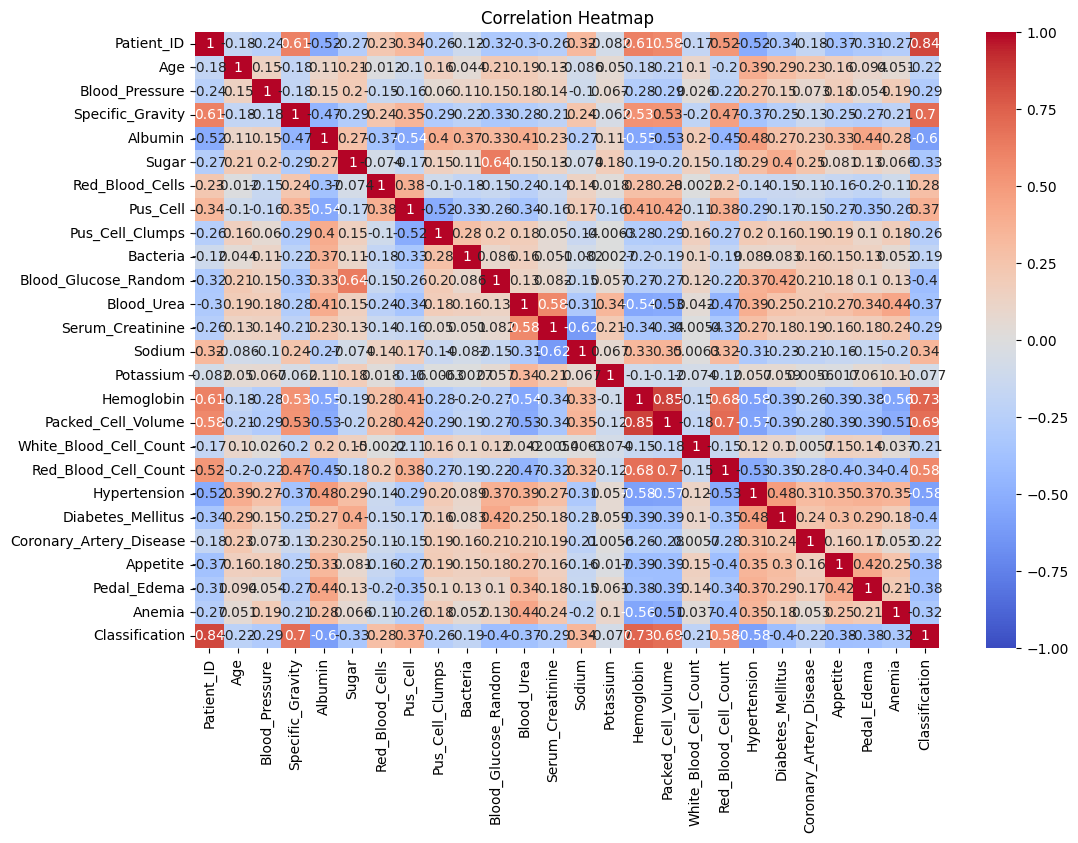

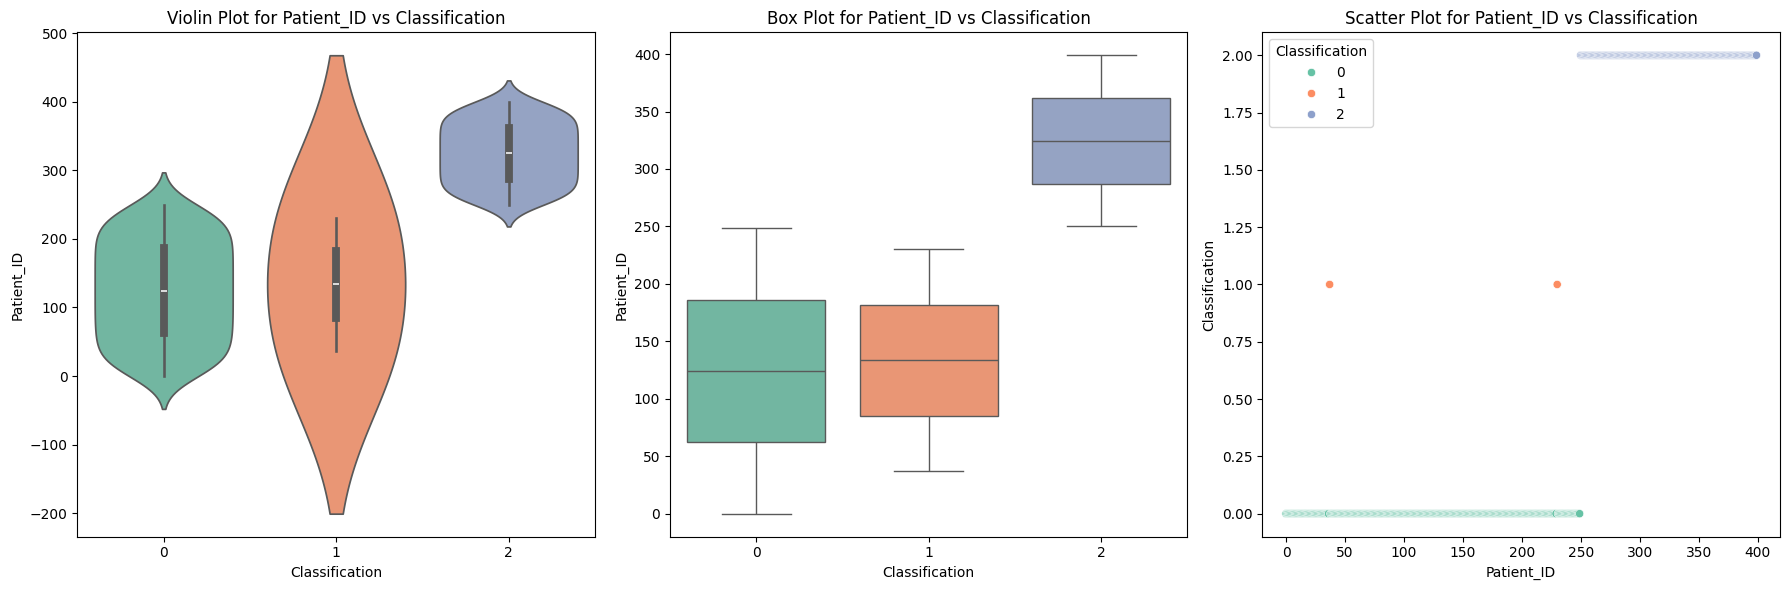

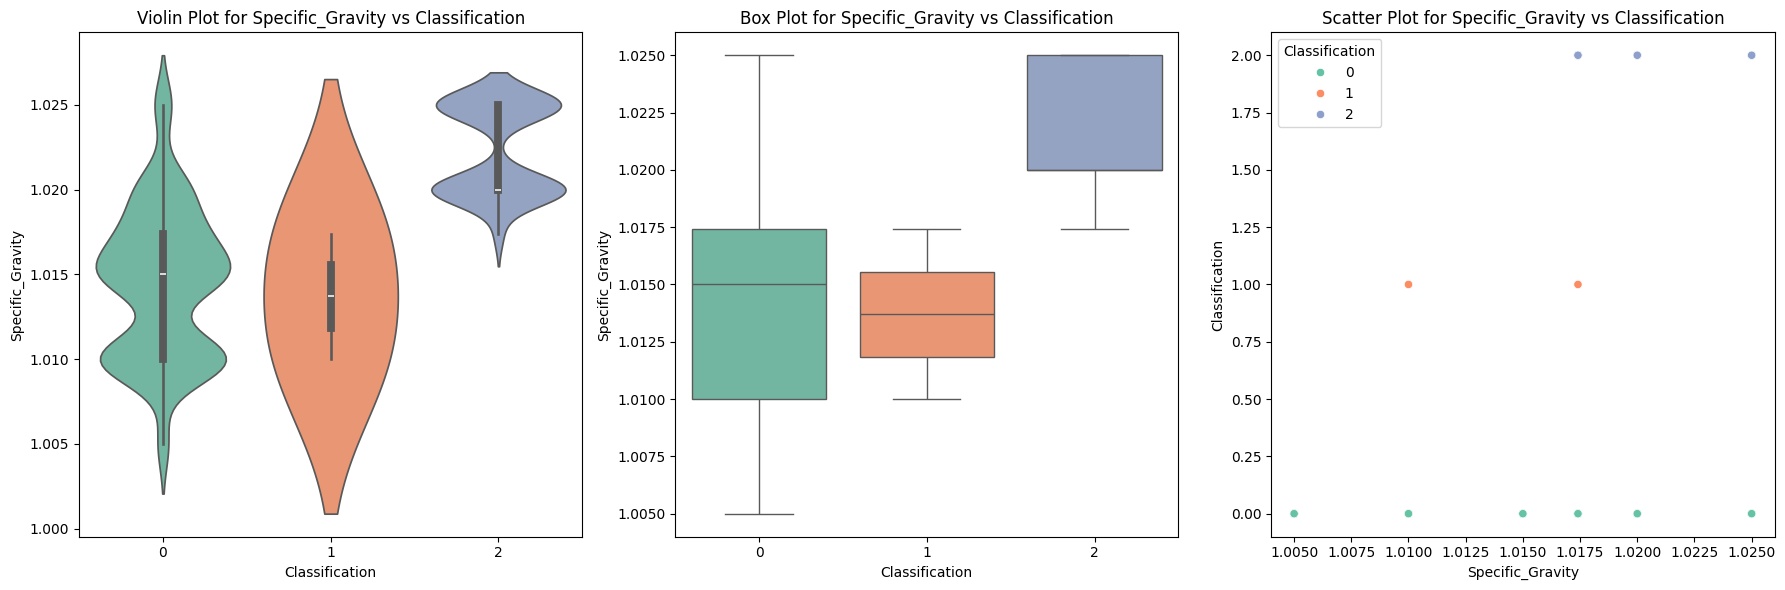

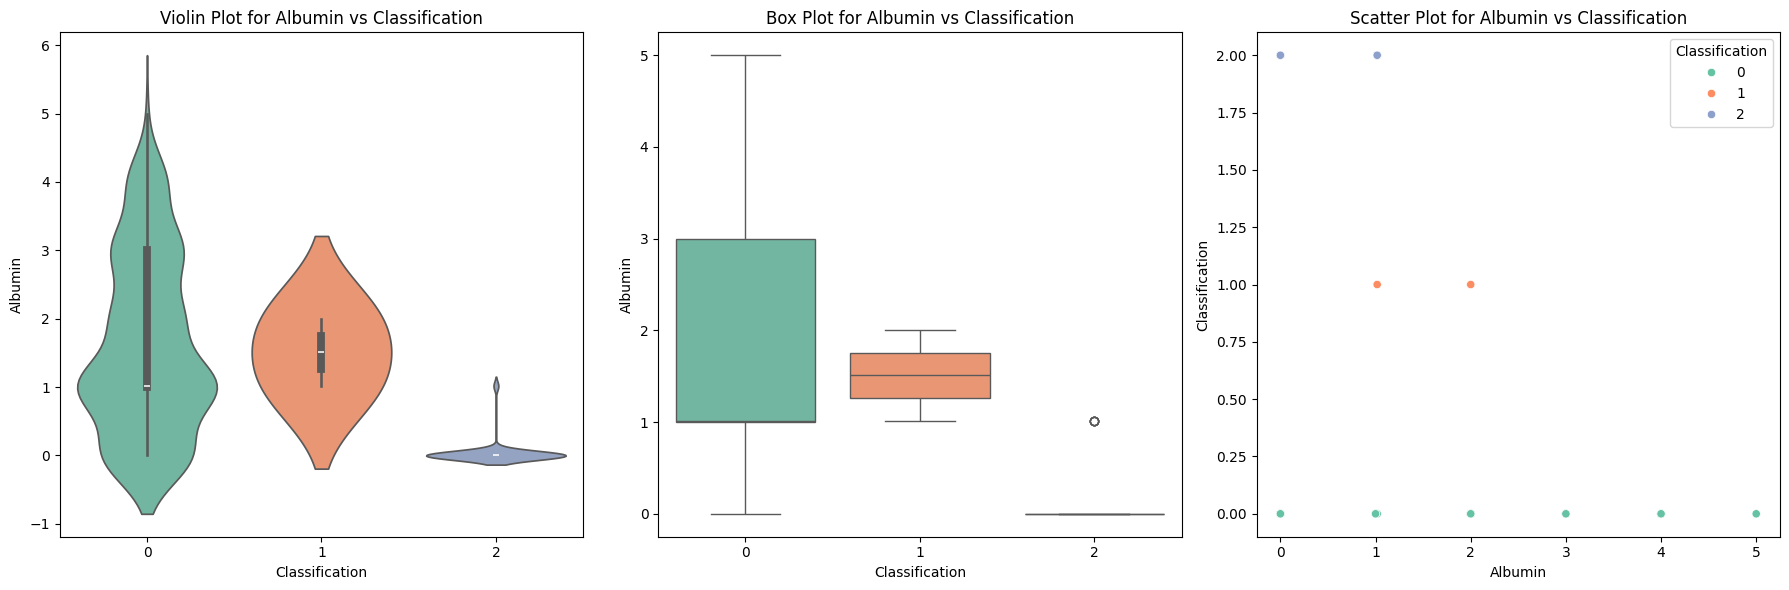

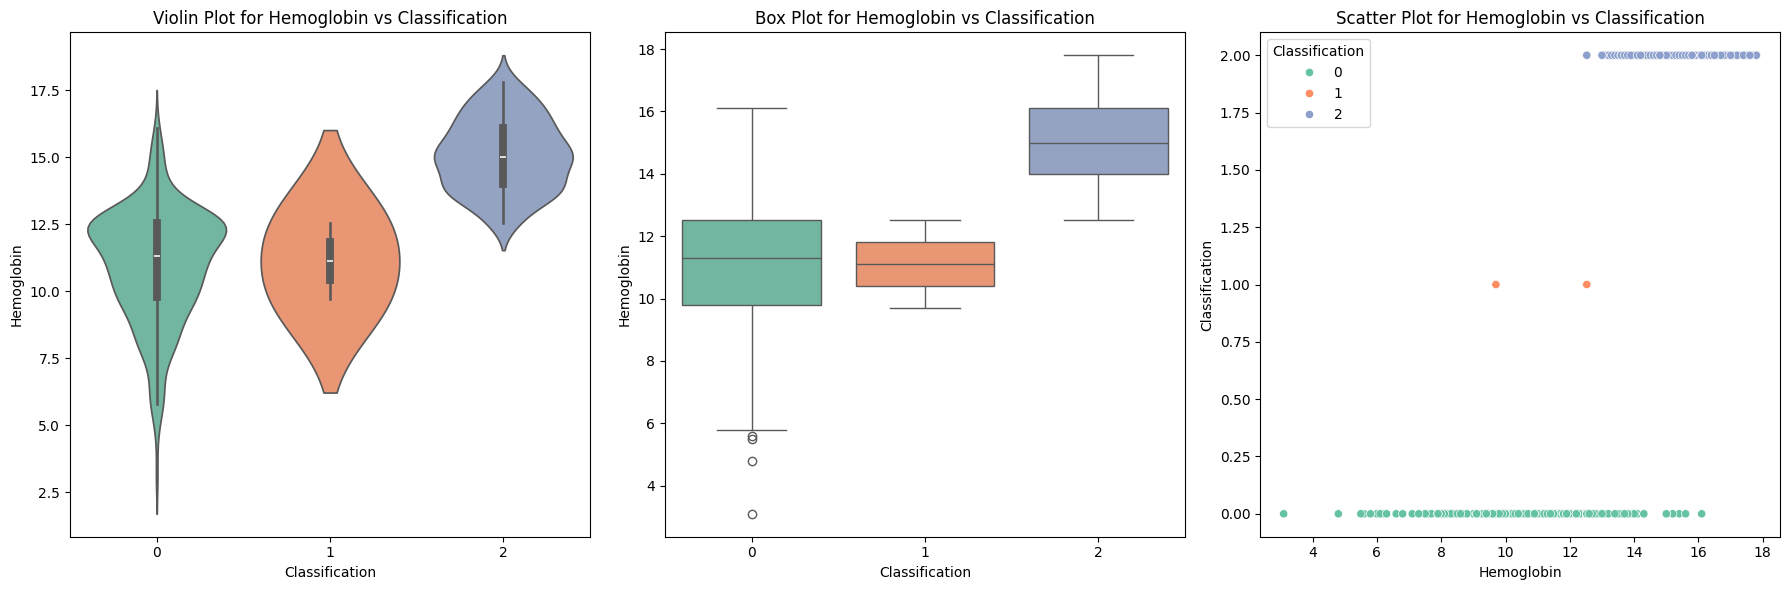

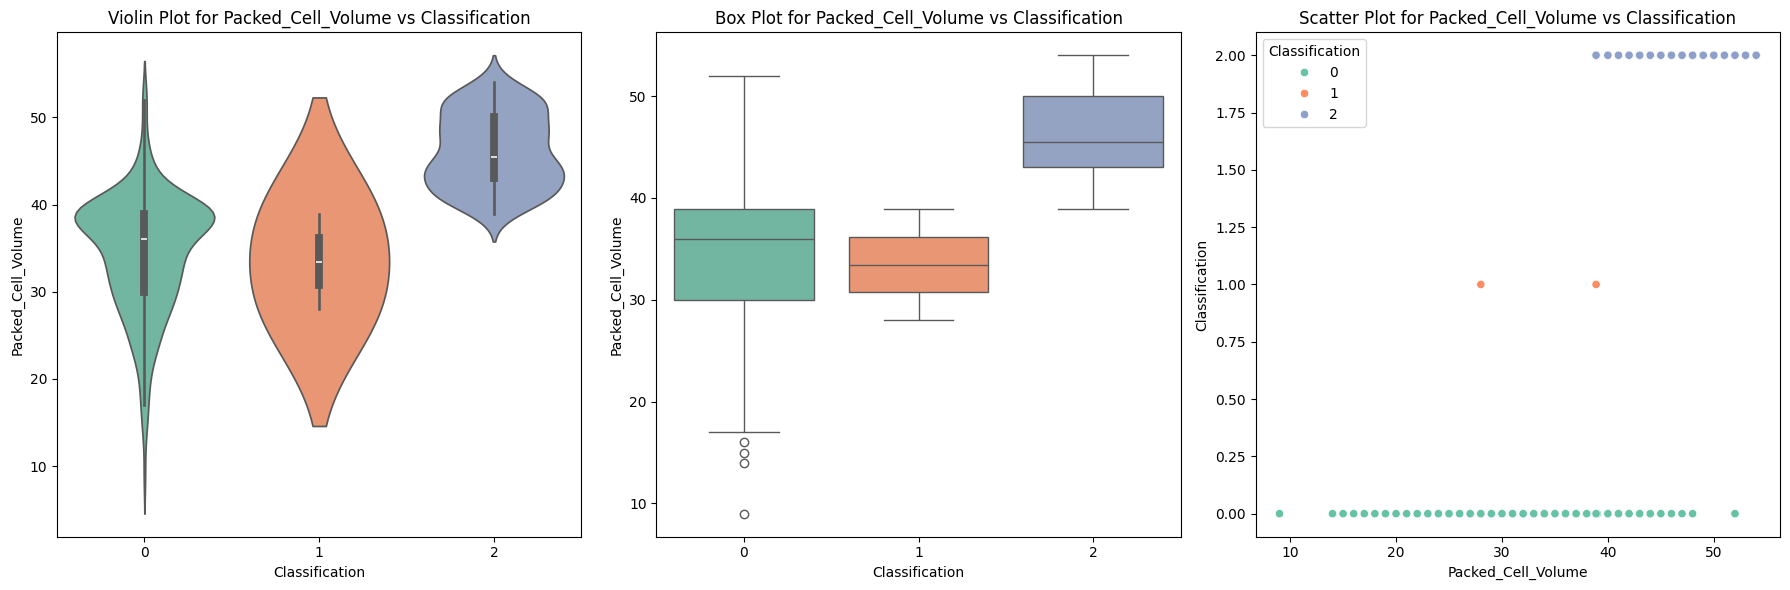

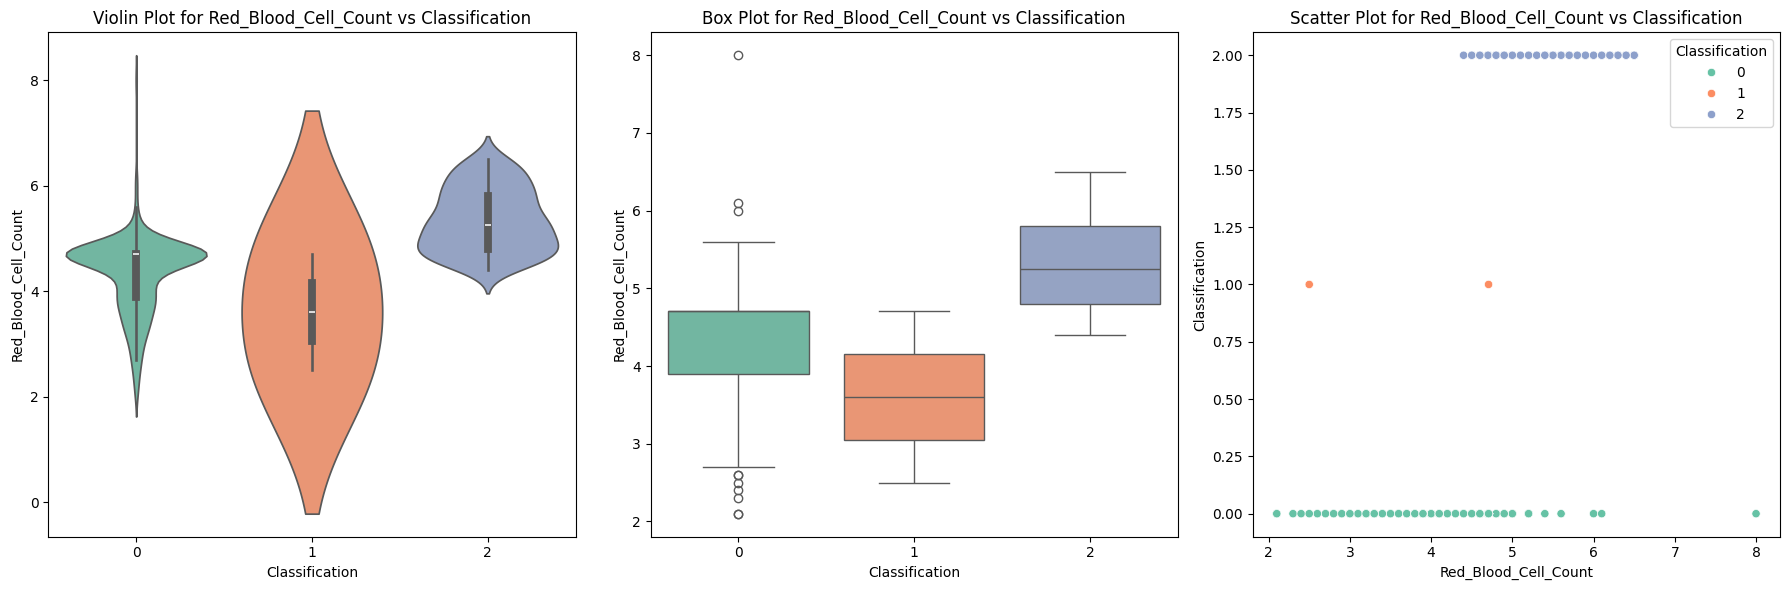

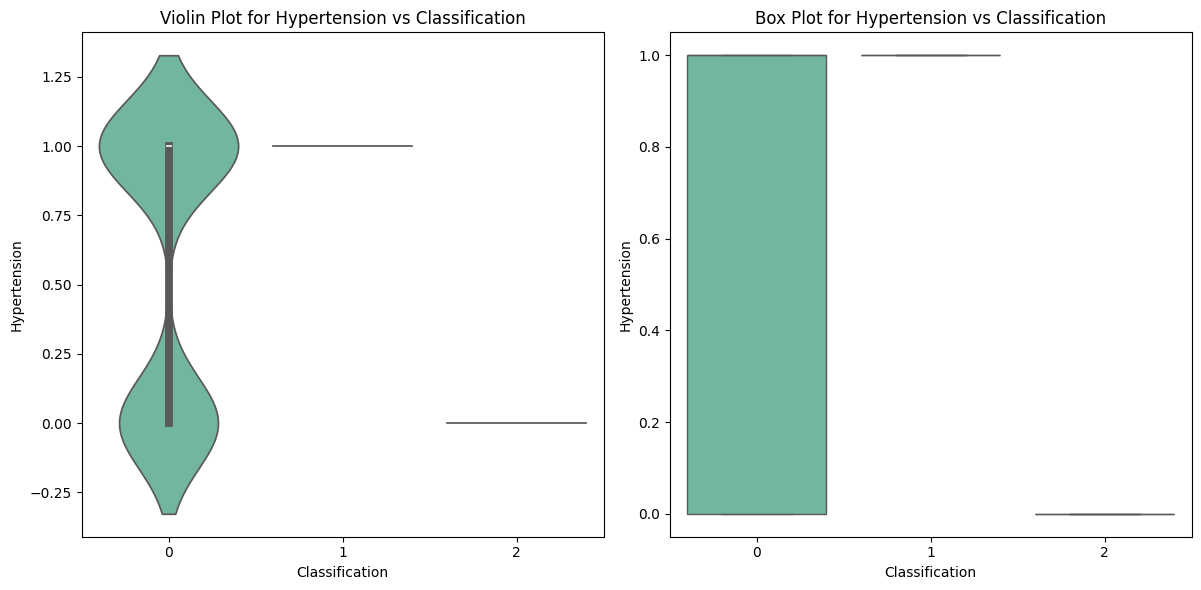

In [16]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

target_column = 'Classification'  # Replace with your actual target column
correlated_features = correlation_matrix[target_column].abs()

high_corr_features = correlated_features[(correlated_features > 0.5) | (correlated_features < -0.5)].index

# Visualizations for the highly correlated features
for feature in high_corr_features:
    if feature != target_column:
        plt.figure(figsize=(18, 6))
        
        # Violin Plot
        plt.subplot(1, 3, 1)
        sns.violinplot(x=df[target_column], y=df[feature], palette='Set2')
        plt.title(f'Violin Plot for {feature} vs {target_column}')
        
        # Box Plot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[target_column], y=df[feature], palette='Set2')
        plt.title(f'Box Plot for {feature} vs {target_column}')
        
        # Scatter Plot (only if it's a numeric feature)
        if df[feature].dtype in ['float64', 'int64']:  # Ensure it's numeric
            plt.subplot(1, 3, 3)
            sns.scatterplot(x=df[feature], y=df[target_column], hue=df[target_column], palette='Set2')
            plt.title(f'Scatter Plot for {feature} vs {target_column}')
        
        plt.tight_layout()
        plt.show()

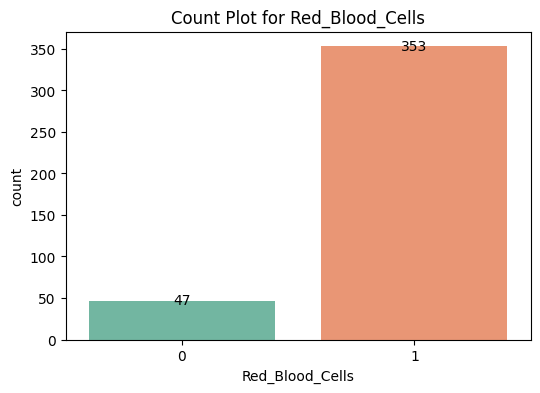

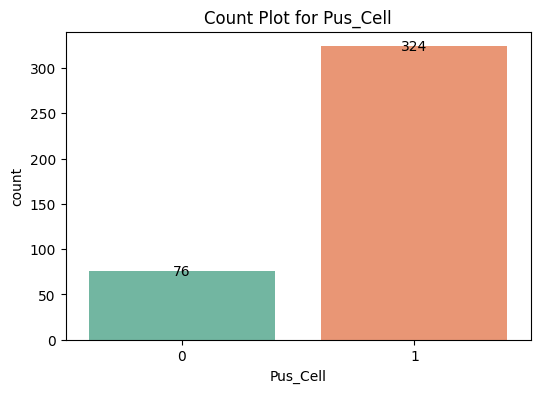

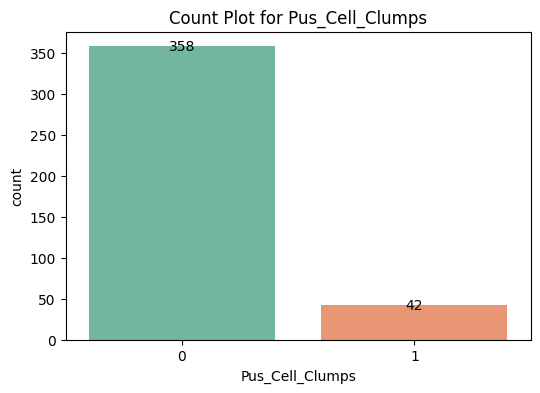

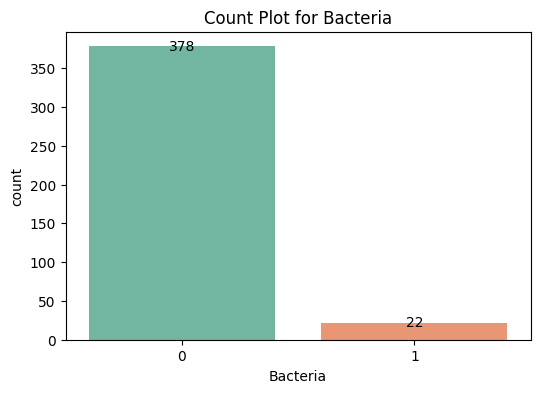

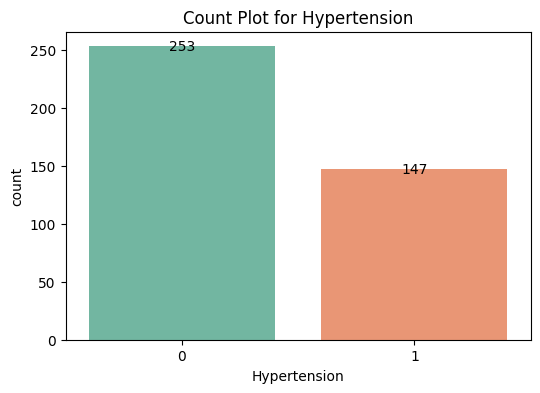

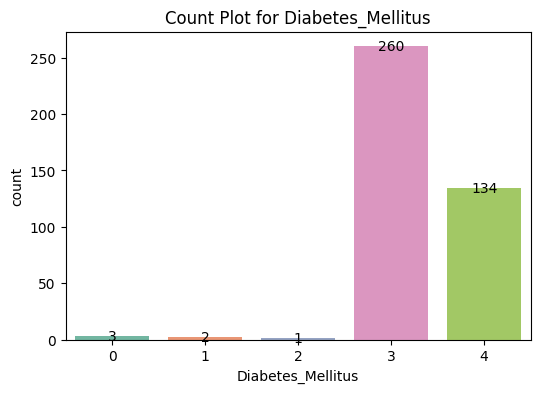

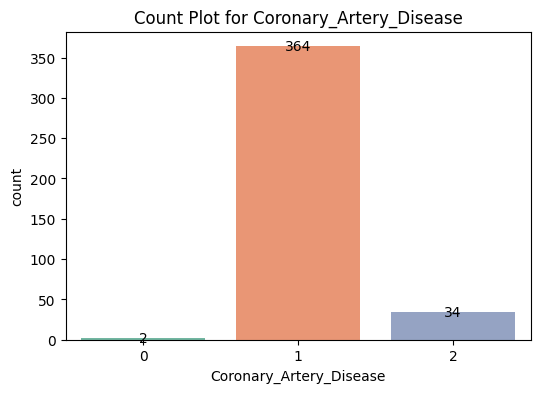

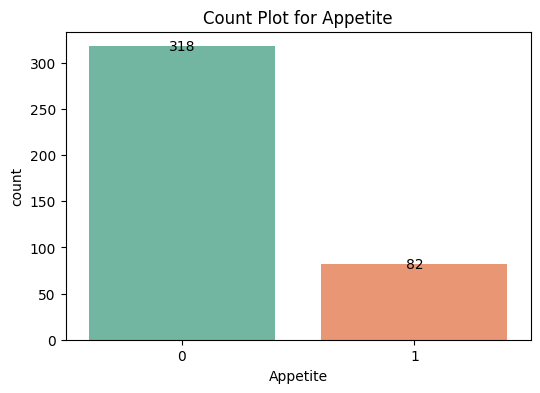

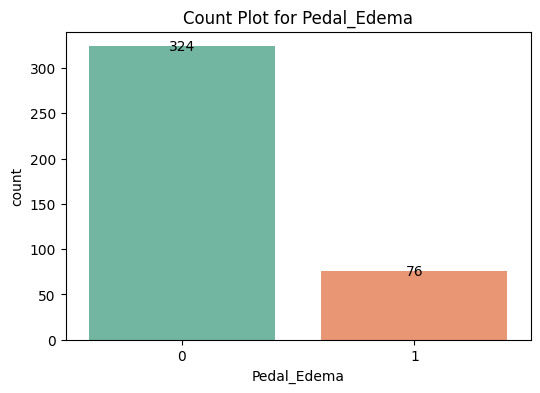

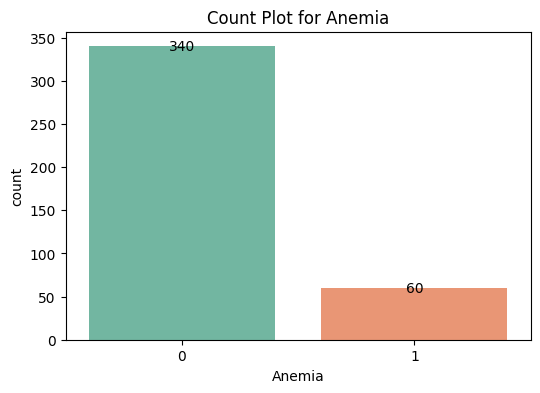

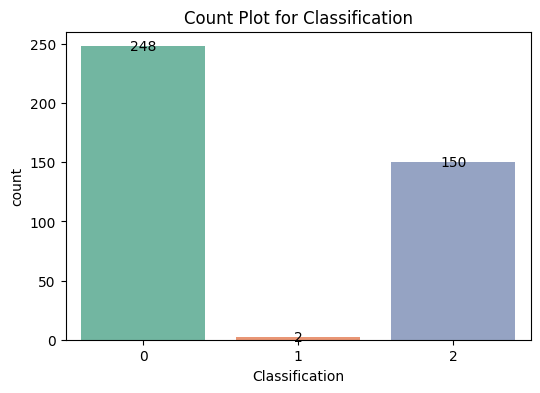

In [17]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns_count = sns.countplot(x=df[col], palette='Set2')  # 'Set2' is a color palette with different colors
    plt.title(f'Count Plot for {col}')
    for p in sns_count.patches:  
        height = p.get_height()  
        sns_count.annotate(f'{int(height)}',  
                           (p.get_x() + p.get_width() / 2., height),  
                           ha='center', va='center')
    plt.show()

In [18]:
X = df.drop(['Patient_ID', 'Classification'], axis=1)
y = df['Classification']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [20]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [21]:
y_pred = model.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9875
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           2       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



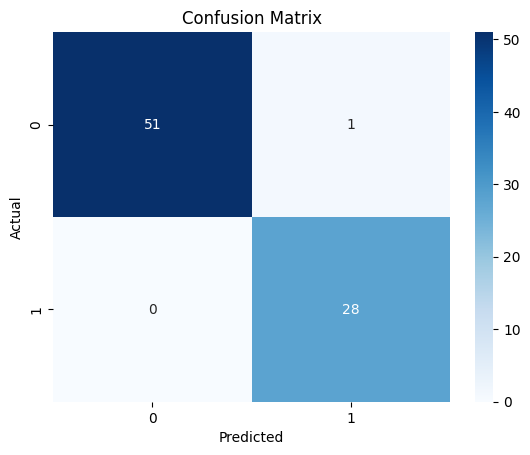

In [23]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
joblib.dump(model, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [25]:
for col in categorical_cols:
    # Check the mapping of labels to categories
    label_mapping = df[col].value_counts().sort_index().to_dict()
    
    print(f"Label mappings for column '{col}':")
    for category, count in label_mapping.items():
        print(f"Category '{category}' -> Label {category}, Count: {count}")
    print("\n" + "="*50 + "\n")

Label mappings for column 'Red_Blood_Cells':
Category '0' -> Label 0, Count: 47
Category '1' -> Label 1, Count: 353


Label mappings for column 'Pus_Cell':
Category '0' -> Label 0, Count: 76
Category '1' -> Label 1, Count: 324


Label mappings for column 'Pus_Cell_Clumps':
Category '0' -> Label 0, Count: 358
Category '1' -> Label 1, Count: 42


Label mappings for column 'Bacteria':
Category '0' -> Label 0, Count: 378
Category '1' -> Label 1, Count: 22


Label mappings for column 'Hypertension':
Category '0' -> Label 0, Count: 253
Category '1' -> Label 1, Count: 147


Label mappings for column 'Diabetes_Mellitus':
Category '0' -> Label 0, Count: 3
Category '1' -> Label 1, Count: 2
Category '2' -> Label 2, Count: 1
Category '3' -> Label 3, Count: 260
Category '4' -> Label 4, Count: 134


Label mappings for column 'Coronary_Artery_Disease':
Category '0' -> Label 0, Count: 2
Category '1' -> Label 1, Count: 364
Category '2' -> Label 2, Count: 34


Label mappings for column 'Appetite':
Categ